Let's build a better model to predict autism in adults (aged 18+) and analyze its performance!

"Class/ASD" is the result of scoring 7 or more among the A1 - A10 columns (values are binary; that is, they are answered as 1 or 0). The "austim" (misspelled in the source dataset, later renamed correctly to "autism") is the assumed true value, where the individuals self-disclose whether they have already been diagnosed with autism.

Actual questions for A1-A10 is shown below after displaying the dataset.

Key to the questionnaire and its source: https://wchh.onlinelibrary.wiley.com/doi/10.1002/psb.1816

The dataset and more information: 
https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults



<b>Part 1. Exploratory data analysis</b>

Before doing anything, let's import some typical libraries and take a look at the dataset, the column names, datatypes of each column, and see if there are any missing values or outliers we should take care of first.

In [1]:
# Let's import libraries to get started
import numpy as np
import pandas as pd

In [2]:
# Let's load the dataset and take a look

# I'll keep a copy of the raw data first
df_raw = pd.read_csv("Autism_Dataraw.csv")

# Let's work with 'df'
df = df_raw
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


For reference on the A1 - A10 scores, according to the questionnaire:


"SCORING: Only 1 point can be scored for each question. Score 1 point for Definitely or Slightly agree on each of items 1, 7, 8, and 10. Score 1 point for Definitely or Slightly Disagree on each of items 2, 3, 4, 5, 6, and 9. If the individual scores more than 6 out of 10, consider referring them for a specialist diagnostic assessment."
 
"Please tick one option per question only:
Definitely agree
Slightly agree
Slightly disagree
Definitely disagree"

1
I often notice small sounds when others do not.
 
2
I usually concentrate more on the whole picture, rather than the small details.
   
3
I find it easy to do more than one thing at once
  
4
If there is an interruption, I can switch back to what I was doing very quickly
  
5
I find it easy to ‘read between the lines’ when someone is talking to me
 
6
I know how to tell if someone listening to me is getting bored
 
7
When I’m reading a story I find it difficult to work out the characters’ intentions
 
8
I like to collect information about categories of things (e.g. types of car, bird, train, plant etc.)
 
9
I find it easy to work out what someone is thinking or feeling just by looking at their face
  
10
I find it difficult to work out people’s intentions

In [3]:
# Let's look at all the columns to see 
# what we're working with
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [4]:
# Let's correct some column misspellings
df = df.rename(
    {'austim': 'autism',
     'jundice': 'jaundice',
     'contry_of_res': 'country_of_res'},
    axis = 'columns'
)

# Check to see if all columns are now spelled correctly
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
# And the datatypes of each?
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [6]:
# The "object" type columns may indicate some issues
# regarding columns that presumably should be int64,
# like the age column. So let's clean the data.
# To start, are there any missing values?
print('Total missing values:', df.isnull().sum().sum())

Total missing values: 0


In [7]:
# Great, but I noticed there are many values
# with a '?'. What columns contain a '?'?
df.columns[df.isin(['?']).any()]

Index(['age', 'ethnicity', 'relation'], dtype='object')

In [8]:
# Let's take care of these, starting with age.

# Briefly describe the age column
display(df['age'].describe())

# What type of values are in the age column?
display(df['age'].apply(type).unique())

count     704
unique     47
top        21
freq       49
Name: age, dtype: object

array([<class 'str'>], dtype=object)

In [9]:
# On first glance it can be seen above that 21 is the
# most common age group that took this questionnaire, 
# among 47 different ages. The str type probably is 
# due to the presence of the '?'. Let's show the 
# unique age values.
df['age'].value_counts()

21     49
20     46
23     37
22     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
17     18
32     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
53      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
58      2
?       2
56      2
61      2
59      1
64      1
60      1
383     1
51      1
Name: age, dtype: int64

In [10]:
# There's age 383 once and age '?' twice.
# Considering these are a total of 3 values,
# I consider this relatively insignificant.
# Let's replace these with the mode age.

# Determine the mode(age)
age_mode = int(df['age'].mode()[0])
print('Mode of age column:', age_mode)

Mode of age column: 21


In [11]:
# Replace the '?' with the mode.
df['age']= df['age'].replace({'?': age_mode})

In [12]:
# Now we can change the datatype of the 
# age column values to int, so that we can
# then replace the 383 value with the mode.
df['age'] = (df['age'].values.astype(int))
df['age']= df['age'].replace({383: age_mode})

In [13]:
# Check to see if age column is cleansed
df['age'].value_counts()

21    52
20    46
23    37
22    37
19    35
24    34
18    31
27    31
30    30
26    28
29    27
25    27
28    24
31    21
32    18
17    18
35    17
37    17
33    16
40    16
42    15
36    13
34    12
38    12
43    11
44    10
47     8
39     7
53     6
55     6
46     6
50     5
52     5
45     4
48     4
49     3
41     3
56     2
61     2
54     2
58     2
60     1
59     1
64     1
51     1
Name: age, dtype: int64

In [14]:
# Now let's investigate ethnicity.
# What are its value counts?
df['ethnicity'].value_counts()

White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [15]:
# There are many issues here. First we can 
# combine "others" with "Others"
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

# Check
df['ethnicity'].value_counts()

White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                31
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
Name: ethnicity, dtype: int64

In [16]:
# Let's remove the quotations ''
df['ethnicity'] = df['ethnicity'].str.strip("''")

# Check
df['ethnicity'].value_counts()

White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              31
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [17]:
# We could replace '?' with the mode (White-European),
# but this may come acrossed as a form as bias.
# To get some more insight, let's look at 
# country of residence.
df['country_of_res'].value_counts()

'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: country_of_res, Length: 67, dtype: int64

In [18]:
# Let's get rid of the quotations
df['country_of_res'] = df['country_of_res'].str.strip("''")
df['country_of_res'].value_counts()

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: country_of_res, Length: 67, dtype: int64

In [19]:
# Check that the country of residence column has no '?'values
df[df['country_of_res'] == '?']['country_of_res']

Series([], Name: country_of_res, dtype: object)

In [20]:
# Let's take a closer look at how many "?" per country
df[['country_of_res', 'ethnicity']].sort_values(['country_of_res', 'ethnicity'], ascending = True).head(20)

,country_of_res,ethnicity
25,Afghanistan,?
80,Afghanistan,?
221,Afghanistan,?
304,Afghanistan,Asian
371,Afghanistan,Asian
22,Afghanistan,Middle Eastern
27,Afghanistan,Middle Eastern
86,Afghanistan,Middle Eastern
294,Afghanistan,Middle Eastern
421,Afghanistan,Middle Eastern


In [21]:
# It can be seen that some countries don't have any ethnicities.
# So let's replace those that have ? with the most common
# ethnicity in that country. If a country has all '?', replacing with 
# 'Others' seems like a reasonable assumption.
df['ethnicity'] =df.groupby('country_of_res')['ethnicity'].apply(
    lambda x: x.replace('?', 'Others') if (x == '?').all() else x.replace('?', x[x != '?'].mode()[0])
)

# Check there are no more '?'
df['ethnicity'].value_counts()



White-European     237
Middle Eastern     160
Asian              130
Others              46
Black               43
South Asian         36
Latino              21
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [22]:
# And let's see these two columns again
df[['country_of_res', 'ethnicity']].sort_values(['country_of_res', 'ethnicity'], ascending = True).head(20)

,country_of_res,ethnicity
304,Afghanistan,Asian
371,Afghanistan,Asian
22,Afghanistan,Middle Eastern
25,Afghanistan,Middle Eastern
27,Afghanistan,Middle Eastern
80,Afghanistan,Middle Eastern
86,Afghanistan,Middle Eastern
221,Afghanistan,Middle Eastern
294,Afghanistan,Middle Eastern
421,Afghanistan,Middle Eastern


In [23]:
# Looking good. Now, the last column with '?' is relation.
# Lets look
df['relation'].value_counts()

Self                          522
?                              95
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

In [24]:
# As usual let's strip any quotations.
df['relation'] = df['relation'].str.strip("''")
df['relation'].value_counts()

Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [25]:
# Relation is who is taking the test. There doesn't seem to be
# any other columns that give us clues as to what to fill these with.
# So we'll go ahead and replace with 'Unknown' for clarity.
df['relation'] =df['relation'].replace('?', 'Unknown')
df['relation'].value_counts()


Self                        522
Unknown                      95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [26]:
# Let's check to see there are no more '?'
df[df.values == '?']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD


In [27]:
# Let's take a final bird's eye view to check value counts
# for each.
for column in df.columns:
    print(df[column].value_counts())
    
    # for spacing
    print("")

1    508
0    196
Name: A1_Score, dtype: int64

0    385
1    319
Name: A2_Score, dtype: int64

0    382
1    322
Name: A3_Score, dtype: int64

0    355
1    349
Name: A4_Score, dtype: int64

0    353
1    351
Name: A5_Score, dtype: int64

0    504
1    200
Name: A6_Score, dtype: int64

0    410
1    294
Name: A7_Score, dtype: int64

1    457
0    247
Name: A8_Score, dtype: int64

0    476
1    228
Name: A9_Score, dtype: int64

1    404
0    300
Name: A10_Score, dtype: int64

21    52
20    46
23    37
22    37
19    35
24    34
18    31
27    31
30    30
26    28
29    27
25    27
28    24
31    21
32    18
17    18
35    17
37    17
33    16
40    16
42    15
36    13
34    12
38    12
43    11
44    10
47     8
39     7
53     6
55     6
46     6
50     5
52     5
45     4
48     4
49     3
41     3
56     2
61     2
54     2
58     2
60     1
59     1
64     1
51     1
Name: age, dtype: int64

m    367
f    337
Name: gender, dtype: int64

White-European     237
Middle Eastern     1

In [28]:
# age_desc is constant. We can drop this.

# Should be true if all values in age_desc are the same
display(df.shape[0] == df['age_desc'].value_counts()[0])
df = df.drop('age_desc', axis = "columns")

True

In [29]:
# Lastly, for consistency, let's lowercase the Class/ASD column.
df['Class/ASD']=df['Class/ASD'].str.lower()

In [30]:
# Let's revisit our columns and ensure everything is clean.
display(df.columns)
display(df.head())

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,no
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,no
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,yes
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,no
4,1,0,0,0,0,0,0,1,0,0,40,f,Middle Eastern,no,no,Egypt,no,2,Unknown,no


<b> Part 2. How accurate is the questionnaire? </b>
Before implementing a better model, let's analyze how well the questionnaire alone did at predicting autism.

In [31]:
# First let's calculate how many times the questionnaire was off.

# Show first few rows of columns we are comparing
display(df[['autism', 'Class/ASD']].head())

# Number of correct classifications from the questionnaire
num_correct_from_q = np.count_nonzero(
    df['autism'] == df['Class/ASD']
)

# Show the results
print("Number of correct classifications:", num_correct_from_q, "out of", df.shape[0])
print("Percentage correct:", np.round(num_correct_from_q/df.shape[0] * 100))

,autism,Class/ASD
0,no,no
1,yes,no
2,yes,yes
3,yes,no
4,no,no


Number of correct classifications: 510 out of 704
Percentage correct: 72.0


In [32]:
# Lets visualize the error.

# Import some more libraries.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score

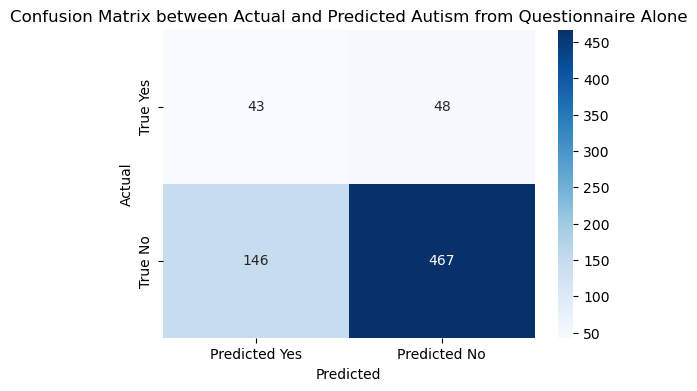

In [33]:
# Create confusion matrix
conf_matrix_original = confusion_matrix(df['autism'], df['Class/ASD'], labels=['yes', 'no'])

# Visualization using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Yes', 'Predicted No'], 
            yticklabels=['True Yes', 'True No'])
plt.title('Confusion Matrix between Actual and Predicted Autism from Questionnaire Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [34]:
# Is the model better than random?

# Compute the kappa statistic
questionnaire_kappa_stat = cohen_kappa_score(df['autism'],df['Class/ASD'])
questionnaire_kappa_stat

0.1606789493737787

The model is slightly better than random.

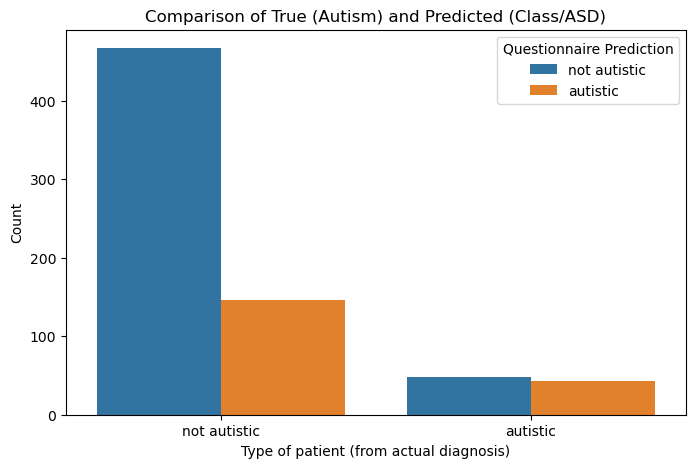

In [35]:
# Visualized another way
# Create a count of true/false predictions
comparison_counts = df.groupby(['autism', 'Class/ASD']).size().reset_index(name='count')


# Replace "yes" and "no" in the 'autism' column with the desired labels
label_map_autism = {'yes': 'autistic', 'no': 'not autistic'}
comparison_counts['autism'] = comparison_counts['autism'].map(label_map_autism)

# Replace "yes" and "no" in the 'Class/ASD' column with 'autistic' and 'not autistic'
label_map_class = {'yes': 'autistic', 'no': 'not autistic'}
comparison_counts['Class/ASD'] = comparison_counts['Class/ASD'].map(label_map_class)



# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='autism', y='count', hue='Class/ASD', data=comparison_counts)
plt.title('Comparison of True (Autism) and Predicted (Class/ASD)')
plt.xlabel('Type of patient (from actual diagnosis)')
plt.ylabel('Count')
plt.legend(title='Questionnaire Prediction')
plt.show()


It can be seen now that the questionnaire predicts autistic patients better than non-autistic. The questionnaire is also slighty better than random. It would benefit if the dataset were larger, but this is what we have to work with. Let's see if we can at least improve the predictions for non-autistic.

<b> Part 3. Building a better model </b> Now let's see if we can increase the percentage of correctly classified patients using the dataframe we cleansed.

In [36]:
# Show the dataframe again for convenience
display(df.head())
display(df.columns)
display(df.dtypes)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,no
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,no
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,yes
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,no
4,1,0,0,0,0,0,0,1,0,0,40,f,Middle Eastern,no,no,Egypt,no,2,Unknown,no


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
relation           object
Class/ASD          object
dtype: object

Let's determine what features to use in our model. Let's go one by one, starting with ethnicity.

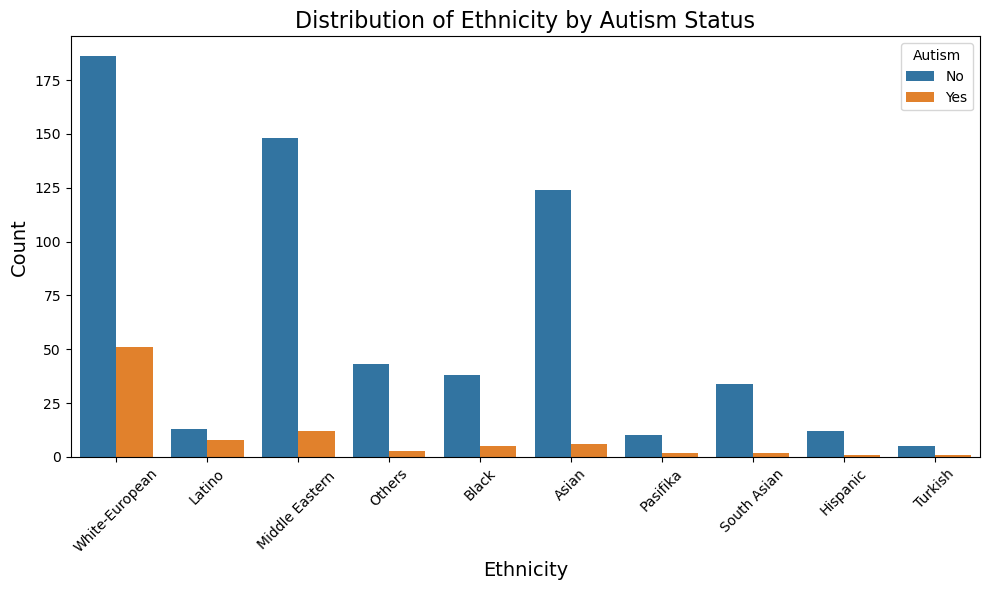

In [37]:
# A visualization might help.

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ethnicity', hue='autism')

# Add title and labels
plt.title('Distribution of Ethnicity by Autism Status', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Autism', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


It may appear that Latinos have a higher rate of autism, but it's a small sample size. Therefore it appears ethnicity has little to do with autism. What about jaundice?

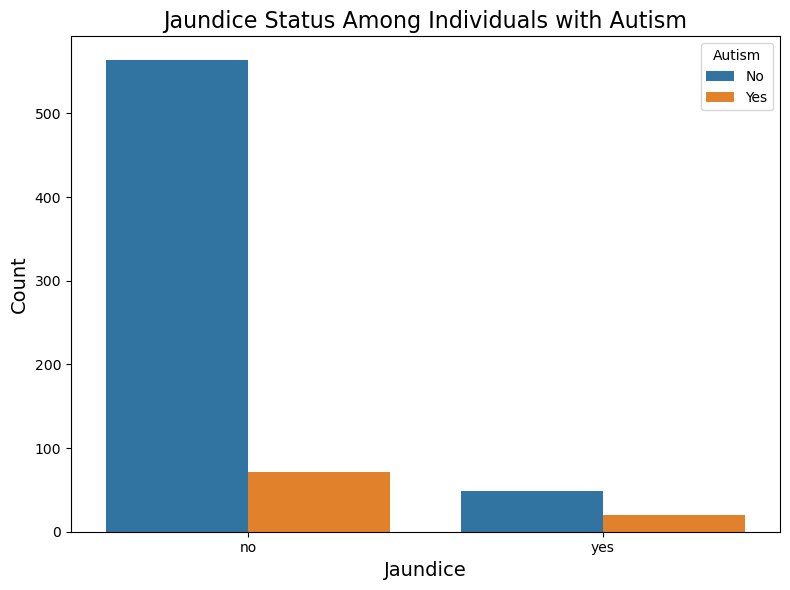

In [38]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='jaundice', hue='autism')

# Add title and labels
plt.title('Jaundice Status Among Individuals with Autism', fontsize=16)
plt.xlabel('Jaundice', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Autism', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


It may be that those with autism tend to have jaundice. But again, not much of an association given the small sample size.  Let's try age.

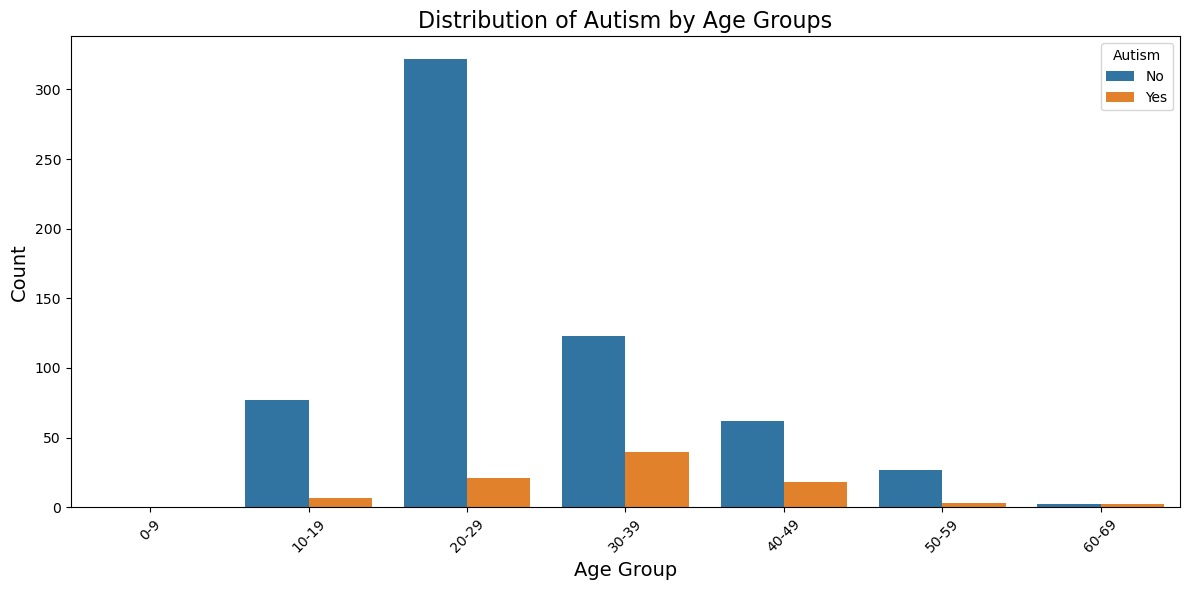

In [39]:
# Define the age bins
bins = range(0, df['age'].max() + 10, 10)  # Adjust based on max age
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # Create labels for the bins

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=pd.cut(df['age'], bins=bins, labels=labels, right=False), hue='autism')

# Add title and labels
plt.title('Distribution of Autism by Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Autism', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



It appears there may be something going on within the 30-39 age group. These seem to have a higher rate of autism, but again this is a small sample size.

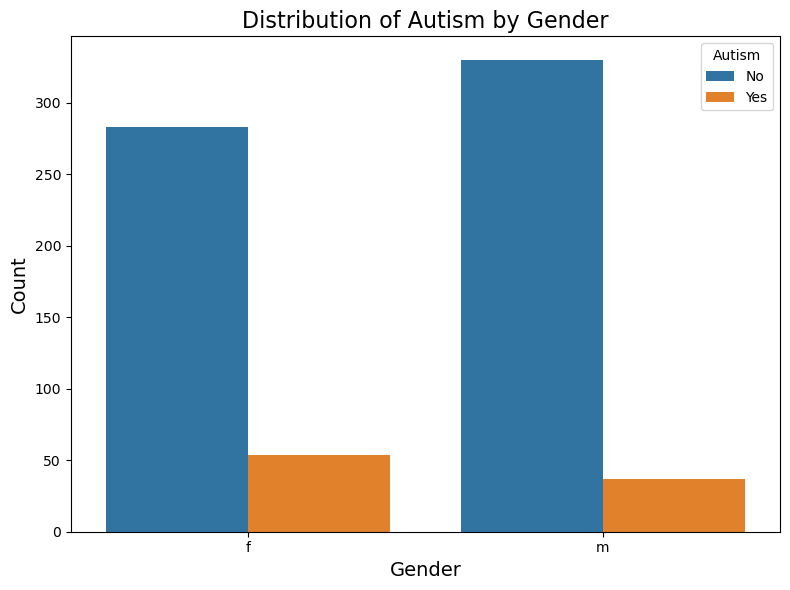

In [40]:
# Create a count plot for gender vs autism
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='autism')

# Add title and labels
plt.title('Distribution of Autism by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Autism', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


As shown, females appear to have a higher rate of autism. Now let's analyze each question.

In [41]:
# List of questions
questions = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
             'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

# Initialize a list to store percent correct
percent_correct = []

# Loop through each question and calculate percent correct
for question in questions:
    percent = np.count_nonzero(df[df['autism'] == 'yes'][question] == 1) / len(df[df['autism'] == 'yes']) * 100
    percent_correct.append(percent)  # Append the result to the list

# Store these as a new DataFrame
most_predictive_questions = pd.DataFrame(
    {'Question': questions,
     "autistic_percent_answered_'1'": percent_correct
    }
).sort_values("autistic_percent_answered_'1'", ascending=False)

# Display the DataFrame
most_predictive_questions



,Question,autistic_percent_answered_'1'
0,A1_Score,83.516484
3,A4_Score,74.725275
9,A10_Score,72.527473
7,A8_Score,69.230769
4,A5_Score,61.538462
2,A3_Score,60.439560
1,A2_Score,54.945055
8,A9_Score,52.747253
5,A6_Score,41.758242
6,A7_Score,40.659341


Shown above are the questions sorted in descending order by most predictive questions (potentially). Note that per the key, questions could mean either agree or disagree depending on the question.


Given everything we've learned about this dataset, let's try some modeling, starting with logistic regression.

In [42]:
# Import some libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
# Let's encode some features as binary
df['jaundice_binary'] = df['jaundice'].map({'yes': 1, 'no': 0})
df['autism_binary'] = df['autism'].map({'yes': 1, 'no': 0})
df['is_female'] = df['gender'].map({'f': 1, 'm': 0})
df['is_male'] = df['gender'].map({'m': 1, 'f': 0})
df['class_binary'] = df['Class/ASD'].map({'yes': 1, 'no':0})

# According to the key, scores greater than 6 are suggested to
# be referred to a health professional
df['score_more_than_6'] = (df['result'] > 6).astype(int)

In [44]:
# Create binary columns for each specific age bin
df['is_10_to_19_yrs_old'] = ((df['age'] >= 10) & (df['age'] <= 19)).astype(int)
df['is_20_to_29_yrs_old'] = ((df['age'] >= 20) & (df['age'] <= 29)).astype(int)
df['is_30_to_39_yrs_old'] = ((df['age'] >= 30) & (df['age'] <= 39)).astype(int)
df['is_40_to_49_yrs_old'] = ((df['age'] >= 40) & (df['age'] <= 49)).astype(int)
df['is_50_to_59_yrs_old'] = ((df['age'] >= 50) & (df['age'] <= 59)).astype(int)
df['is_60_to_69_yrs_old'] = ((df['age'] >= 60) & (df['age'] <= 69)).astype(int)

In [45]:
# One-hot encode the ethnicities and store 
df= pd.get_dummies(df, columns=['ethnicity'], prefix='', prefix_sep='')

In [46]:
# Check out the dataframe
display(df.head())
display(df.columns)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Asian,Black,Hispanic,Latino,Middle Eastern,Others,Pasifika,South Asian,Turkish,White-European
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'autism', 'country_of_res', 'used_app_before', 'result',
       'relation', 'Class/ASD', 'jaundice_binary', 'autism_binary',
       'is_female', 'is_male', 'class_binary', 'score_more_than_6',
       'is_10_to_19_yrs_old', 'is_20_to_29_yrs_old', 'is_30_to_39_yrs_old',
       'is_40_to_49_yrs_old', 'is_50_to_59_yrs_old', 'is_60_to_69_yrs_old',
       'Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern ', 'Others',
       'Pasifika', 'South Asian', 'Turkish', 'White-European'],
      dtype='object')

In [47]:
# It looks like Middle Eastern has a slight typo
df.rename(columns={'Middle Eastern ': 'Middle Eastern'}, inplace=True)

Now, let's use feature selection to determine what features have the most potential predictive power.

In [48]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
            'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
            'A9_Score', 'A10_Score', 'jaundice_binary',
            'is_female', 'is_male', 'score_more_than_6',
            'is_10_to_19_yrs_old', 'is_20_to_29_yrs_old',
            'is_30_to_39_yrs_old', 'is_40_to_49_yrs_old',
            'is_50_to_59_yrs_old', 'is_60_to_69_yrs_old',
            'Asian', 'Black', 'Hispanic', 'Latino',
            'Middle Eastern', 'Others', 'Pasifika', 
            'South Asian', 'Turkish', 'White-European']

target = 'autism_binary'

# Create features X and target y as DataFrames
X = df[features]
y = df[target]

# Perform chi-squared test to select the top features
chi_scores, p_values = chi2(X, y)

# Create a DataFrame to display the chi-squared scores and p-values
chi2_results = pd.DataFrame({
    'Feature': features,
    'Chi2 Score': chi_scores,
    'P-value': p_values
})

# Sort the results by Chi2 Score and P-value
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Display the top features
print(chi2_results_sorted)


                Feature  Chi2 Score   P-value
16  is_30_to_39_yrs_old   19.533287  0.000010
13    score_more_than_6   16.210143  0.000057
10      jaundice_binary   15.810645  0.000070
29       White-European   15.547707  0.000080
15  is_20_to_29_yrs_old   14.106727  0.000173
8              A9_Score   13.377805  0.000255
3              A4_Score   13.335998  0.000260
23               Latino   11.819475  0.000586
20                Asian    7.977511  0.004736
5              A6_Score    6.555465  0.010456
17  is_40_to_49_yrs_old    6.514902  0.010697
2              A3_Score    4.938097  0.026271
19  is_60_to_69_yrs_old    4.884714  0.027096
24       Middle Eastern    4.185476  0.040772
9             A10_Score    4.175036  0.041024
11            is_female    2.872928  0.090081
4              A5_Score    2.859845  0.090816
12              is_male    2.638084  0.104329
1              A2_Score    2.140024  0.143500
0              A1_Score    1.868185  0.171683
27          South Asian    1.73759

In [50]:
from sklearn.metrics import (accuracy_score, recall_score,
    f1_score
                            )

# Let's take top 'n' and experiment
features = chi2_results_sorted['Feature'][:6]  # Adjust as needed
target = 'autism_binary'

# Prepare the features and target variable
X_lr = df[features]
y_lr = df[target]

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = model_lr.predict(X_test_lr)

# Create confusion matrix for logistic regression
conf_matrix_log_reg = confusion_matrix(y_test_lr, y_pred_lr)

# Print the confusion matrix and kappa stat for logistic regression
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
kappa_lr = cohen_kappa_score(y_test_lr, y_pred_lr)
print("Kappa stat:", kappa_lr)

# Calculate various metrics
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
recall_lr = recall_score(y_test_lr, y_pred_lr)
f1_lr = f1_score(y_test_lr, y_pred_lr)

# Print metrics
print(f"Accuracy: {accuracy_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print(f"Kappa Score: {kappa_lr}")



Logistic Regression Confusion Matrix:
 [[127   1]
 [ 12   1]]
Kappa stat: 0.11148812409112951
Accuracy: 0.9078014184397163
Recall: 0.07692307692307693
F1 Score: 0.13333333333333336
Kappa Score: 0.11148812409112951


In [51]:
# Store the maximum Kappa score and corresponding number of features
max_kappa_score = -np.inf
optimal_num_features = 0

# Loop through different numbers of features to find the optimal one
for num_features in range(1, len(chi2_results_sorted)):
    # Select the top features
    selected_features = chi2_results_sorted['Feature'][:num_features]
    print(f"Using top {num_features} features: {list(selected_features)}")
    
    # Prepare the features and target variable
    X = df[selected_features]
    y = df['autism_binary']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Create confusion matrix for logistic regression
    conf_matrix_log_reg = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix and Kappa score
    print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)
    kappa_score = cohen_kappa_score(y_test, y_pred)
    print(f"Kappa stat with top {num_features} features: {kappa_score}\n")

    # Check if this is the best Kappa score so far
    if kappa_score > max_kappa_score:
        max_kappa_score = kappa_score
        optimal_num_features = num_features

# Output the optimal number of features and maximum Kappa score
print(f"The optimal number of features is {optimal_num_features} with a Kappa score of {max_kappa_score}")



Using top 1 features: ['is_30_to_39_yrs_old']
Confusion Matrix for Logistic Regression:
 [[128   0]
 [ 13   0]]
Kappa stat with top 1 features: 0.0

Using top 2 features: ['is_30_to_39_yrs_old', 'score_more_than_6']
Confusion Matrix for Logistic Regression:
 [[128   0]
 [ 13   0]]
Kappa stat with top 2 features: 0.0

Using top 3 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary']
Confusion Matrix for Logistic Regression:
 [[126   2]
 [ 13   0]]
Kappa stat with top 3 features: -0.025206010664081235

Using top 4 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European']
Confusion Matrix for Logistic Regression:
 [[126   2]
 [ 13   0]]
Kappa stat with top 4 features: -0.025206010664081235

Using top 5 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old']
Confusion Matrix for Logistic Regression:
 [[126   2]
 [ 13   0]]
Kappa stat with top 5 features: -0.025206010664081235

U

Confusion Matrix for Logistic Regression:
 [[126   2]
 [ 12   1]]
Kappa stat with top 26 features: 0.09366391184573009

Using top 27 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old', 'A9_Score', 'A4_Score', 'Latino', 'Asian', 'A6_Score', 'is_40_to_49_yrs_old', 'A3_Score', 'is_60_to_69_yrs_old', 'Middle Eastern', 'A10_Score', 'is_female', 'A5_Score', 'is_male', 'A2_Score', 'A1_Score', 'South Asian', 'Others', 'is_10_to_19_yrs_old', 'Hispanic', 'A8_Score', 'is_50_to_59_yrs_old', 'Pasifika']
Confusion Matrix for Logistic Regression:
 [[126   2]
 [ 12   1]]
Kappa stat with top 27 features: 0.09366391184573009

Using top 28 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old', 'A9_Score', 'A4_Score', 'Latino', 'Asian', 'A6_Score', 'is_40_to_49_yrs_old', 'A3_Score', 'is_60_to_69_yrs_old', 'Middle Eastern', 'A10_Score', 'is_female', 'A5_Score', 'is_male', 'A2_Score', '

The optimal features appear to be the top 6 as seen above, before the kappa stat diverges. So far this is the best model. Yet, it appears these demographic data and jaundice add complication to studying autism. We've gained many insights thus far, but according to this dataset, these factors make the original questionnaire's rules perform worse. Let's try one more model doing the same procedure and summarize our results.

In [52]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Store the maximum Kappa score and corresponding number of features
max_kappa_rf = -np.inf
optimal_num_features_rf = 0

# Loop through different numbers of features to find the optimal one
for num_features in range(1, len(chi2_results_sorted)):
    # Select the top 'num_features' features
    selected_features_rf = chi2_results_sorted['Feature'][:num_features]
    print(f"Using top {num_features} features: {list(selected_features_rf)}")
    
    # Prepare the features and target variable
    X_rf = df[selected_features_rf]
    y_rf = df['autism_binary']

    # Split the data into training and testing sets
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

    # Initialize and fit the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)

    # Make predictions
    y_pred_rf = rf_model.predict(X_test_rf)

    # Create confusion matrix for Random Forest
    conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

    # Print the confusion matrix and Kappa score
    print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
    kappa_rf = cohen_kappa_score(y_test_rf, y_pred_rf)
    print(f"Kappa stat with top {num_features} features: {kappa_rf}\n")

    # Check if this is the best Kappa score so far
    if kappa_rf > max_kappa_rf:
        max_kappa_rf = kappa_rf
        optimal_num_features_rf = num_features

# Output the optimal number of features and maximum Kappa score
print(f"The optimal number of features for Random Forest is {optimal_num_features_rf} with a Kappa score of {max_kappa_rf}")



Using top 1 features: ['is_30_to_39_yrs_old']
Confusion Matrix for Random Forest:
 [[128   0]
 [ 13   0]]
Kappa stat with top 1 features: 0.0

Using top 2 features: ['is_30_to_39_yrs_old', 'score_more_than_6']
Confusion Matrix for Random Forest:
 [[128   0]
 [ 13   0]]
Kappa stat with top 2 features: 0.0

Using top 3 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary']
Confusion Matrix for Random Forest:
 [[128   0]
 [ 13   0]]
Kappa stat with top 3 features: 0.0

Using top 4 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European']
Confusion Matrix for Random Forest:
 [[126   2]
 [ 13   0]]
Kappa stat with top 4 features: -0.025206010664081235

Using top 5 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old']
Confusion Matrix for Random Forest:
 [[126   2]
 [ 13   0]]
Kappa stat with top 5 features: -0.025206010664081235

Using top 6 features: ['is_30_to_39_yrs_old', 'sc

Confusion Matrix for Random Forest:
 [[122   6]
 [ 13   0]]
Kappa stat with top 26 features: -0.061831153388822724

Using top 27 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old', 'A9_Score', 'A4_Score', 'Latino', 'Asian', 'A6_Score', 'is_40_to_49_yrs_old', 'A3_Score', 'is_60_to_69_yrs_old', 'Middle Eastern', 'A10_Score', 'is_female', 'A5_Score', 'is_male', 'A2_Score', 'A1_Score', 'South Asian', 'Others', 'is_10_to_19_yrs_old', 'Hispanic', 'A8_Score', 'is_50_to_59_yrs_old', 'Pasifika']
Confusion Matrix for Random Forest:
 [[122   6]
 [ 13   0]]
Kappa stat with top 27 features: -0.061831153388822724

Using top 28 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old', 'A9_Score', 'A4_Score', 'Latino', 'Asian', 'A6_Score', 'is_40_to_49_yrs_old', 'A3_Score', 'is_60_to_69_yrs_old', 'Middle Eastern', 'A10_Score', 'is_female', 'A5_Score', 'is_male', 'A2_Score', 'A1_Score

In [53]:
# Select the top 10 features from the Chi-Squared results
top_10_features = chi2_results_sorted['Feature'][:10]
print(f"Using top 10 features: {list(top_10_features)}")

# Prepare the features and target variable
X_rf = df[top_10_features]
y_rf = df['autism_binary']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Create confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

# Calculate various metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test_rf, y_pred_rf)

# Print metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Kappa Score: {kappa_rf}")



Using top 10 features: ['is_30_to_39_yrs_old', 'score_more_than_6', 'jaundice_binary', 'White-European', 'is_20_to_29_yrs_old', 'A9_Score', 'A4_Score', 'Latino', 'Asian', 'A6_Score']
Confusion Matrix for Random Forest:
 [[125   3]
 [ 11   2]]
Accuracy: 0.900709219858156
Recall: 0.15384615384615385
F1 Score: 0.2222222222222222
Kappa Score: 0.18023255813953487


<b>Summary and Conclusion</b>

In [55]:
# Summary
print("Summary:\n")

# Random forest
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
print(f"Kappa stat for Random forest: {kappa_rf}")
print(f"Accuracy: {accuracy_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("")

# Logistic regression
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("Kappa stat:", kappa_lr)
print(f"Accuracy: {accuracy_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print("")

# Original
print("Confusion Matrix for Original Questionnaire Model:\n", conf_matrix_original)

y_original = df['autism']  # Actual labels
y_pred_original = df['Class/ASD']  # Predicted labels

# Calculate various metrics
accuracy_original = accuracy_score(y_original, y_pred_original)
recall_original = recall_score(y_original, y_pred_original, pos_label='yes')  # Set the positive label as needed
f1_original = f1_score(y_original, y_pred_original, pos_label='yes')  # Set the positive label as needed
kappa_original = cohen_kappa_score(y_original, y_pred_original)

print(f"Kappa Score: {kappa_original}")
print(f"Accuracy: {accuracy_original}")
print(f"Recall: {recall_original}")
print(f"F1 Score: {f1_original}")




Summary:

Confusion Matrix for Random Forest:
 [[125   3]
 [ 11   2]]
Kappa stat for Random forest: 0.18023255813953487
Accuracy: 0.900709219858156
Recall: 0.15384615384615385
F1 Score: 0.2222222222222222

Logistic Regression Confusion Matrix:
 [[126   2]
 [ 12   1]]
Kappa stat: 0.11148812409112951
Accuracy: 0.9078014184397163
Recall: 0.07692307692307693
F1 Score: 0.13333333333333336

Confusion Matrix for Original Questionnaire Model:
 [[ 43  48]
 [146 467]]
Kappa Score: 0.1606789493737787
Accuracy: 0.7244318181818182
Recall: 0.4725274725274725
F1 Score: 0.3071428571428571


<b>Summary</b>: As shown above, both random forest and logistic regression achieve a <b>higher accuracy</b>, by up to <b>18%</b>, compared to the original model. But the low recall rates indicate many false negatives. This shows that the models are struggling more to predict positive cases. The random forest model has the highest kappa score amongst the three, but it still needs to be closer to 1 to truly demonstrate effectiveness.

<b>To conclude</b>, the lower recall rates show just how complicated autism is and how much more research needs to be done in detecting autism. Behavioral analyses appear to be the true indicators of detecting autism, not demographic data. Unless more demographic data is available, more funding should be done in these behavioral traits.